## Hypothesis
To predict the incentive level requested to predict the incentive level requested to shut down or lower 5 degrees during the winter
    
IV: Age, Gender, OwnRent, SqftCate, HouseholdS, Political, Ethnic, Income, Educ
    Latitude, HomeW, EnergyC, MC, ComfNW, HabitC, Winter_avg

In [69]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);
#populate missing values
#survey$IncHomeS[survey$IncHomeS==99] = NA;
#survey$IncHomeS[survey$IncHomeS==999] = NA;

#survey <- survey[survey$HomeS>60,];
#survey <- survey[survey$HomeS<80,];

#survey <- survey[survey$HomeW>60,];
#survey <- survey[survey$HomeW<80,];

data <- survey[,-c(1:7)];

#We investigate only use people who use A/C when being at home in summer
data1 <- data[data$HomeSYN==1,-which(names(data) %in% c("HomeWYN","AwayWNY","HomeSYN","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Attitude","Trust","MCG","Frugal","ComfortS","ComfortW","SubN","PBC","ACYN","HeatYN",
    "Longitude", "Job","hot","cold"))];

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       3       5       6       7      99 


  1   2   3   4   5   6   7   8  99 
 61  42  68 132 102  79  88  79  11 

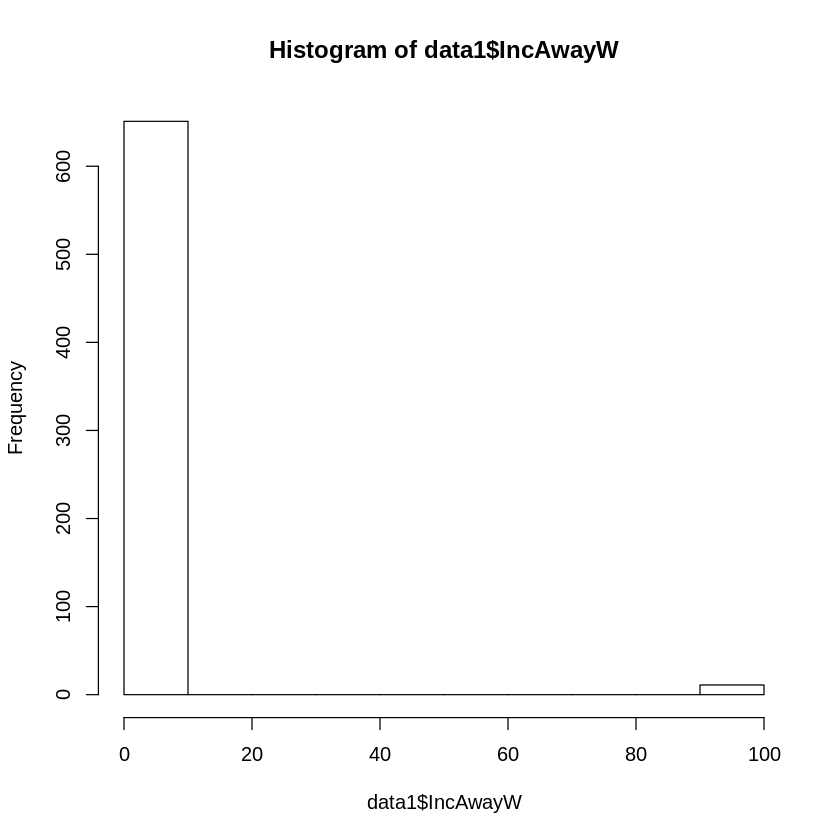

In [70]:
summary(data1$IncAwayW)
table(data1$IncAwayW)
hist(data1$IncAwayW)

In [71]:
#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

[1] "HomeW" "28"   
[1] "AwayW" "87"   
[1] "AwayS" "101"  
[1] "IncWD" "56"   
[1] "IncDish" "183"    
[1] "Age" "4"  
[1] "Income" "3"     
[1] "Educ" "5"   
[1] "Latitude" "21"      
[1] "Summer_avgF" "33"         
[1] "Winter_avgF" "33"         
[1] "Summer_avgC" "33"         
[1] "Winter_avgC" "33"         
[1] "Summer_avg" "33"        
[1] "Winter_avg" "33"        


In [72]:
#lets remover these
data2 <- data1[,-which(names(data1) %in% c("HomeW","AwayW",
                    "AwayS","IncWD","IncDish"))];
print(dim(data2))
data2 <- na.omit(data2)
print(dim(data2))
#table(data2$Political)

[1] 662 104
[1] 601 104


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       3       5       6       7      99 


  1   2   3   4   5   6   7   8  99 
 59  38  64 114  93  66  80  76  11 

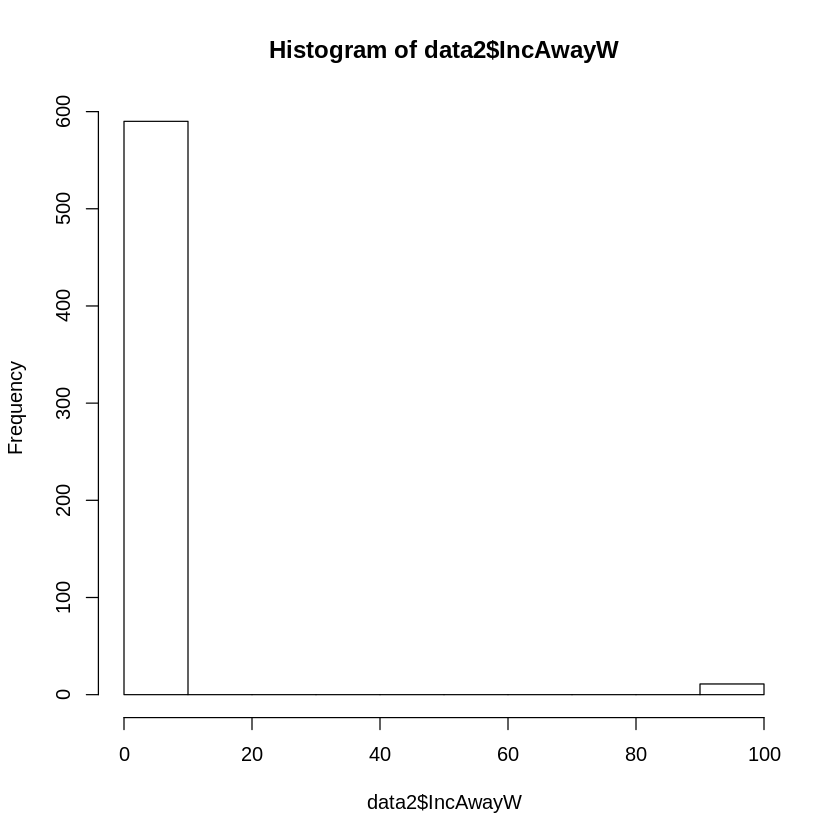

In [73]:
summary(data2$IncAwayW)
table(data2$IncAwayW)
hist(data2$IncAwayW)

In [74]:
sort(names(data2))

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "BillS"       "BillW"       "CashYN"      "ComfNS"     
 [11] "ComfNS1"     "ComfNS2"     "ComfNS3"     "ComfNW"      "ComfNW1"    
 [16] "ComfNW2"     "ControlN1"   "ControlN2R"  "ControlN3"   "ControlN4"  
 [21] "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"      "Educ"       
 [26] "EmerRForm"   "EnergyC"     "EnergyC1"    "EnergyC2"    "EnergyC3"   
 [31] "EnergyC4"    "Ethnic"      "Frugal1"     "Frugal2"     "Frugal3"    
 [36] "Gender"      "HabitC"      "HabitC1"     "HabitC2"     "HabitC3"    
 [41] "HabitC4"     "HabitC5"     "HabitC6"     "HabitC7"     "HabitE1"    
 [46] "HabitE2"     "HabitE3"     "HabitG"      "HomeS"       "HouseholdS" 
 [51] "INT1"        "INT2"        "INT3"        "INT4"        "IncAutoS"   
 [56] "IncAutoW"    "IncAwayS"    "IncAwayW"    "IncEmer10S"  "IncEmer10W" 
 [61] "IncEmer30S"  "IncEmer30W"  "IncHomeS"    "IncHomeW"    "Income"     
 [66] "Latitude"    "MC"          "MC1"         "MC2"         "MC3"        
 [71] "MC4"         "MC5"         "MCBill"      "OwnRent"     "PBC1"       
 [76] "PBC2"        "PBC3R"       "PBC4"        "PBC5"        "Political"  
 [81] "RewardForm"  "SN"          "SN1"         "SN2"         "SN3"        
 [86] "SN4"         "Sqft"        "SqftCate"    "State"       "SubNorm"    
 [91] "SubNorm1"    "SubNorm2"    "SubNorm3"    "Summer_avg"  "Summer_avgC"
 [96] "Summer_avgF" "Trust1"      "Trust2"      "Trust3"      "Trust4"     
[101] "Winter_avg"  "Winter_avgC" "Winter_avgF" "X.9to5"

In [75]:
#names(data2)
#These are only variables we really care about
IVS = c("Age",
"Gender",
"OwnRent",
"SqftCate",
"HouseholdS",
"Political",
"Ethnic",
"Income",
"Educ",
"Frugal",
"MC",
"EnergyC",
"Trust",
"ComfNW",
"Atti",
"SubNorm",
"PBC",
"SN",
"HabitG",
"HabitC",
"Latitude",
"Winter_avgF",     
"HomeW",
"CashYN")

In [76]:
sort(names(data2))
paste(sort(IVS))

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "BillS"       "BillW"       "CashYN"      "ComfNS"     
 [11] "ComfNS1"     "ComfNS2"     "ComfNS3"     "ComfNW"      "ComfNW1"    
 [16] "ComfNW2"     "ControlN1"   "ControlN2R"  "ControlN3"   "ControlN4"  
 [21] "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"      "Educ"       
 [26] "EmerRForm"   "EnergyC"     "EnergyC1"    "EnergyC2"    "EnergyC3"   
 [31] "EnergyC4"    "Ethnic"      "Frugal1"     "Frugal2"     "Frugal3"    
 [36] "Gender"      "HabitC"      "HabitC1"     "HabitC2"     "HabitC3"    
 [41] "HabitC4"     "HabitC5"     "HabitC6"     "HabitC7"     "HabitE1"    
 [46] "HabitE2"     "HabitE3"     "HabitG"      "HomeS"       "HouseholdS" 
 [51] "INT1"        "INT2"        "INT3"        "INT4"        "IncAutoS"   
 [56] "IncAutoW"    "IncAwayS"    "IncAwayW"    "IncEmer10S"  "IncEmer10W" 
 [61] "IncEmer30S"  "IncEmer30W"  "IncHomeS"    "IncHomeW"    "Income"     
 [66] "Latitude"    "MC"          "MC1"         "MC2"         "MC3"        
 [71] "MC4"         "MC5"         "MCBill"      "OwnRent"     "PBC1"       
 [76] "PBC2"        "PBC3R"       "PBC4"        "PBC5"        "Political"  
 [81] "RewardForm"  "SN"          "SN1"         "SN2"         "SN3"        
 [86] "SN4"         "Sqft"        "SqftCate"    "State"       "SubNorm"    
 [91] "SubNorm1"    "SubNorm2"    "SubNorm3"    "Summer_avg"  "Summer_avgC"
 [96] "Summer_avgF" "Trust1"      "Trust2"      "Trust3"      "Trust4"     
[101] "Winter_avg"  "Winter_avgC" "Winter_avgF" "X.9to5"

[1] "Age"         "Atti"        "CashYN"      "ComfNW"      "Educ"       
 [6] "EnergyC"     "Ethnic"      "Frugal"      "Gender"      "HabitC"     
[11] "HabitG"      "HomeW"       "HouseholdS"  "Income"      "Latitude"   
[16] "MC"          "OwnRent"     "PBC"         "Political"   "SN"         
[21] "SqftCate"    "SubNorm"     "Trust"       "Winter_avgF"

In [77]:
data1 <- data2[, which(names(data2) %in% c("IncAwayW",IVS))];
sort(names(data1))

[1] "Age"         "Atti"        "CashYN"      "ComfNW"      "Educ"       
 [6] "EnergyC"     "Ethnic"      "Gender"      "HabitC"      "HabitG"     
[11] "HouseholdS"  "IncAwayW"    "Income"      "Latitude"    "MC"         
[16] "OwnRent"     "Political"   "SN"          "SqftCate"    "SubNorm"    
[21] "Winter_avgF"

In [78]:
#Check to see if there are anymore missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

In [79]:
#names(data1)

#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}
    
    
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
#hiCor(data1,.75)

In [80]:
data2 <- data1;
data2 <- na.omit(data2)
names(data2)

[1] "IncAwayW"    "Age"         "Gender"      "OwnRent"     "SqftCate"   
 [6] "HouseholdS"  "Political"   "Ethnic"      "Income"      "Educ"       
[11] "Latitude"    "EnergyC"     "CashYN"      "MC"          "ComfNW"     
[16] "Atti"        "SubNorm"     "SN"          "HabitG"      "HabitC"     
[21] "Winter_avgF"

In [81]:
#Check to see if there are anymore missing values
for (n in names(data2)){
    nmis = sum(is.na(data2[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data2[,n]))))
}

In [82]:
hiCor(data2,.7)

,Latitude,Winter_avgF
Latitude,1.00,-0.85
Winter_avgF,-0.85,1.00


In [83]:
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:20];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2)

for (i in 1:20){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


[1] 0.13
    EnergyC    MC  Atti SubNorm    SN HabitG HabitC
PC1   -0.42 -0.34 -0.44   -0.38 -0.23  -0.31  -0.28
[1] 0.24
      Age OwnRent SqftCate HouseholdS Income
PC2 -0.34    -0.5    -0.52      -0.27  -0.43
[1] 0.33
    Latitude Winter_avgF
PC3    -0.65        0.65
[1] 0.4
    Gender HouseholdS Ethnic  Educ ComfNW HabitC
PC4   0.37       0.48  -0.31 -0.31   0.47  -0.28
[1] 0.46
    Political Ethnic Income  Educ EnergyC HabitG HabitC
PC5      -0.5   0.21  -0.26 -0.44   -0.24    0.4   0.29
[1] 0.52
      Age Gender Ethnic CashYN    MC ComfNW   SN HabitC
PC6 -0.44  -0.28  -0.27  -0.41 -0.28  -0.27 0.35   0.25
[1] 0.57
    IncAwayW   Age Gender Political Income CashYN SubNorm   SN
PC7     0.34 -0.23  -0.26     -0.21   0.23   0.62    0.22 0.26
[1] 0.62
    IncAwayW Gender Ethnic   MC HabitG
PC8    -0.75  -0.31  -0.27 0.22    0.3
[1] 0.66
     Age Gender HouseholdS Educ EnergyC CashYN ComfNW  Atti SubNorm   SN
PC9 0.33   0.21       -0.3 0.29   -0.25  -0.29   0.45 -0.22    0.21 0.29
[1] 

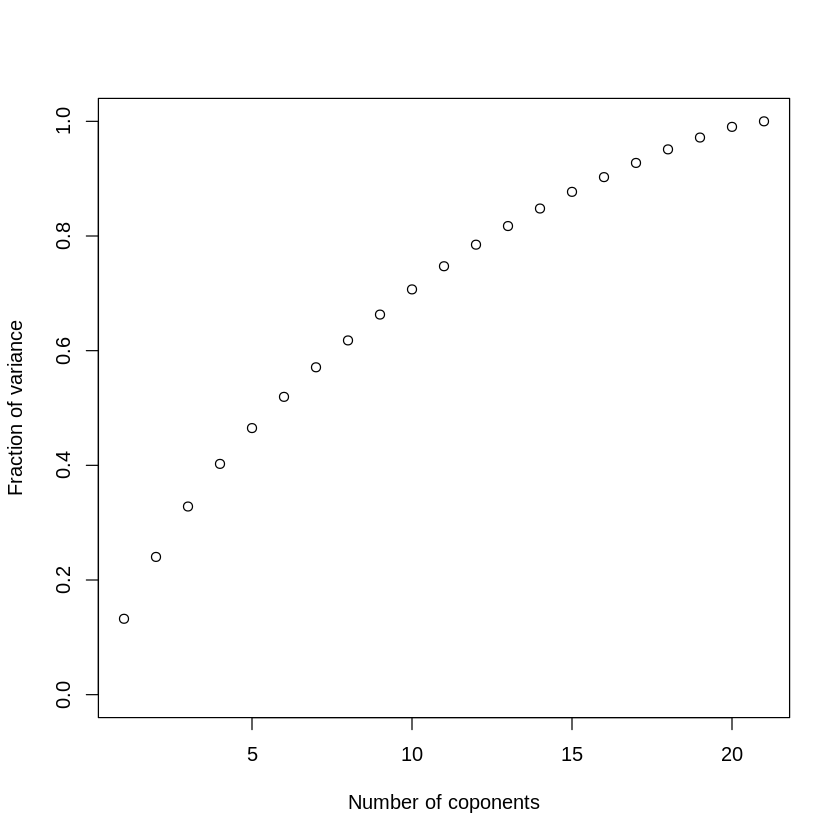

In [84]:
plot(1:dim(data2)[2],cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [85]:
res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}

In [86]:
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

Winter_avgF,21,0.64
Latitude,11,0.63
Atti,16,0.42
EnergyC,12,0.40
SqftCate,5,0.38
OwnRent,4,0.33
Income,9,0.27
SubNorm,17,0.27
HouseholdS,6,0.25
HabitC,20,0.25
MC,14,0.23


In [87]:
fit <- factanal(data2, 2, rotation="varimax")
print(fit, digits=2, cutoff=.3, sort=TRUE)


Call:
factanal(x = data2, factors = 2, rotation = "varimax")

Uniquenesses:
   IncAwayW         Age      Gender     OwnRent    SqftCate  HouseholdS 
       0.99        0.99        0.92        1.00        0.99        1.00 
  Political      Ethnic      Income        Educ    Latitude     EnergyC 
       0.94        0.97        1.00        0.98        0.38        0.51 
     CashYN          MC      ComfNW        Atti     SubNorm          SN 
       1.00        0.79        0.98        0.42        0.74        0.92 
     HabitG      HabitC Winter_avgF 
       0.86        0.90        0.00 

Loadings:
            Factor1 Factor2
EnergyC      0.68          
Atti         0.75          
SubNorm      0.50          
Latitude             0.76  
Winter_avgF         -0.97  
IncAwayW                   
Age                        
Gender                     
OwnRent                    
SqftCate                   
HouseholdS                 
Political                  
Ethnic                     
Income  

In [88]:
IndepPred <- row.names(res[o,][res[o,2]<.7,])

In [89]:
#IndepPred = c('Atti', 'EnergyC', 'SqftCate', 'OwnRent', 'MC', 'HouseholdS', 'Income', 'SubNorm', 'HabitC', 'Educ', 'PBC', 'Political', 'Gender', 'ComfNW', 'Latitude', 'Ethnic')
IndepPred = c('Age', 'Gender', 'OwnRent', 'SqftCate', 'HouseholdS', 'Political', 'Ethnic', 'Income', 'Educ', 'Latitude', 'EnergyC', 'MC', 'ComfNW', 'HabitC', 'Winter_avgF')

In [90]:
fmla <- as.formula(paste("IncAwayW",paste(IndepPred,collapse="+"),sep="~"));

In [91]:
table(data2[,"IncAwayW"])


  1   2   3   4   5   6   7   8  99 
 59  38  64 114  93  66  80  76  11 

In [92]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-10.84  -3.66  -1.50   0.72  93.42 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   3.6445     9.7774    0.37    0.709  
Age           0.0528     0.0516    1.02    0.307  
Gender       -0.9237     1.1247   -0.82    0.412  
OwnRent      -0.8950     1.2248   -0.73    0.465  
SqftCate     -0.7423     0.5944   -1.25    0.212  
HouseholdS    0.1455     0.4969    0.29    0.770  
Political    -0.6729     0.6827   -0.99    0.325  
Ethnic        1.5383     1.4472    1.06    0.288  
Income        0.5190     0.3032    1.71    0.087 .
Educ         -0.6433     0.5093   -1.26    0.207  
Latitude     -0.0298     0.1638   -0.18    0.856  
EnergyC      -0.2334     0.4204   -0.56    0.579  
MC           -0.1262     0.5178   -0.24    0.808  
ComfNW        0.1358     0.3303    0.41    0.681  
HabitC        0.7023     0.3954    1.78    0.076 .
Winter_avgF   0.1052     0.0746    1.41    0.

In [93]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,159.4,159.4,0.975,0.324
Gender,1,146.6,146.6,0.897,0.344
OwnRent,1,100.1,100.1,0.613,0.434
SqftCate,1,22.5,22.5,0.137,0.711
HouseholdS,1,18.6,18.6,0.114,0.736
Political,1,390.5,390.5,2.390,0.123
Ethnic,1,52.0,52.0,0.318,0.573
Income,1,261.2,261.2,1.599,0.207
Educ,1,285.6,285.6,1.748,0.187
Latitude,1,670.5,670.5,4.103,0.043


In [94]:
mod = lm(fmla,data=data2,subs=data2$Latitude>37)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Latitude > 37)

Residuals:
   Min     1Q Median     3Q    Max 
-10.92  -2.87  -0.66   1.58  86.14 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -5.1002    10.0949   -0.51   0.6138   
Age           0.1289     0.0478    2.70   0.0073 **
Gender       -0.0917     1.0650   -0.09   0.9314   
OwnRent       1.1762     1.2213    0.96   0.3363   
SqftCate     -1.0120     0.5701   -1.78   0.0769 . 
HouseholdS    0.3448     0.5027    0.69   0.4933   
Political    -1.3224     0.6341   -2.09   0.0378 * 
Ethnic        1.4936     1.5260    0.98   0.3284   
Income        0.1370     0.2914    0.47   0.6386   
Educ         -1.1021     0.4812   -2.29   0.0227 * 
Latitude      0.0137     0.1956    0.07   0.9444   
EnergyC       0.4872     0.3886    1.25   0.2109   
MC            0.6698     0.4736    1.41   0.1583   
ComfNW        0.0117     0.3130    0.04   0.9702   
HabitC        0.3485     0.3769    0.92   0.3558   

In [95]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,750.7,750.7,9.285,0.0025
Gender,1,2.4,2.4,0.029,0.8639
OwnRent,1,38.5,38.5,0.476,0.4906
SqftCate,1,93.8,93.8,1.160,0.2822
HouseholdS,1,81.5,81.5,1.008,0.3162
Political,1,424.8,424.8,5.254,0.0226
Ethnic,1,57.2,57.2,0.707,0.4010
Income,1,1.8,1.8,0.023,0.8803
Educ,1,335.2,335.2,4.145,0.0426
Latitude,1,17.0,17.0,0.210,0.6470


In [96]:
mod = lm(fmla,data=data2,subs=data2$Winter_avgF<40)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Winter_avgF < 
    40)

Residuals:
   Min     1Q Median     3Q    Max 
-10.92  -2.13  -0.21   1.66  86.48 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -7.0143     7.2227   -0.97    0.332  
Age           0.0908     0.0390    2.33    0.021 *
Gender       -0.5643     0.8575   -0.66    0.511  
OwnRent       1.0921     0.9747    1.12    0.263  
SqftCate     -0.5104     0.4569   -1.12    0.265  
HouseholdS   -0.2020     0.3902   -0.52    0.605  
Political    -0.7065     0.5079   -1.39    0.165  
Ethnic        1.4590     1.2480    1.17    0.243  
Income        0.0267     0.2378    0.11    0.911  
Educ         -0.9810     0.3850   -2.55    0.011 *
Latitude      0.0928     0.1177    0.79    0.431  
EnergyC       0.4361     0.3176    1.37    0.171  
MC            0.5049     0.3833    1.32    0.189  
ComfNW        0.2918     0.2502    1.17    0.244  
HabitC        0.4882     0.2977    1.64    0.102  
Winter_

In [97]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,4.0e+02,400.44,7.4608,0.0066
Gender,1,2.8e+00,2.82,0.0525,0.8189
OwnRent,1,1.4e+01,14.17,0.2640,0.6077
SqftCate,1,6.6e+01,66.24,1.2342,0.2674
HouseholdS,1,1.7e-01,0.17,0.0032,0.9552
Political,1,1.7e+02,168.60,3.1413,0.0773
Ethnic,1,5.3e+01,52.87,0.9850,0.3217
Income,1,2.4e+01,24.00,0.4472,0.5041
Educ,1,2.6e+02,256.20,4.7733,0.0296
Latitude,1,9.7e+00,9.71,0.1810,0.6708


In [98]:
IndepPred = c('Age', 'Gender', 'OwnRent', 'SqftCate', 'HouseholdS', 'Political', 'Ethnic', 'Income', 'Educ', 'Latitude', 'EnergyC', 'MC', 'ComfNW', 'HabitC', 'Winter_avgF', 'CashYN')
fmla <- as.formula(paste("IncAwayW",paste(IndepPred,collapse="+"),sep="~"));

In [99]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-10.92  -3.72  -1.55   0.66  93.31 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   1.7738     9.9570    0.18    0.859  
Age           0.0500     0.0517    0.97    0.334  
Gender       -0.9012     1.1249   -0.80    0.423  
OwnRent      -0.8151     1.2275   -0.66    0.507  
SqftCate     -0.7307     0.5945   -1.23    0.220  
HouseholdS    0.1539     0.4970    0.31    0.757  
Political    -0.6464     0.6832   -0.95    0.344  
Ethnic        1.5660     1.4474    1.08    0.280  
Income        0.5012     0.3037    1.65    0.099 .
Educ         -0.6518     0.5094   -1.28    0.201  
Latitude     -0.0242     0.1639   -0.15    0.883  
EnergyC      -0.2413     0.4205   -0.57    0.566  
MC           -0.1700     0.5197   -0.33    0.744  
ComfNW        0.1284     0.3304    0.39    0.698  
HabitC        0.7259     0.3961    1.83    0.067 .
Winter_avgF   0.1054     0.0746    1.41    0.

In [100]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,159.4,159.4,0.975,0.324
Gender,1,146.6,146.6,0.897,0.344
OwnRent,1,100.1,100.1,0.613,0.434
SqftCate,1,22.5,22.5,0.137,0.711
HouseholdS,1,18.6,18.6,0.114,0.736
Political,1,390.5,390.5,2.390,0.123
Ethnic,1,52.0,52.0,0.318,0.573
Income,1,261.2,261.2,1.599,0.207
Educ,1,285.6,285.6,1.748,0.187
Latitude,1,670.5,670.5,4.103,0.043


In [101]:
mod = lm(fmla,data=data2,subs=data2$Latitude>37)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Latitude > 37)

Residuals:
   Min     1Q Median     3Q    Max 
-11.01  -2.93  -0.61   1.56  86.11 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -5.8586    10.2335   -0.57   0.5674   
Age           0.1260     0.0482    2.62   0.0094 **
Gender       -0.0795     1.0666   -0.07   0.9407   
OwnRent       1.2330     1.2287    1.00   0.3164   
SqftCate     -1.0120     0.5708   -1.77   0.0772 . 
HouseholdS    0.3420     0.5034    0.68   0.4974   
Political    -1.3226     0.6349   -2.08   0.0381 * 
Ethnic        1.5325     1.5301    1.00   0.3173   
Income        0.1345     0.2918    0.46   0.6452   
Educ         -1.0985     0.4818   -2.28   0.0233 * 
Latitude      0.0145     0.1958    0.07   0.9412   
EnergyC       0.4828     0.3892    1.24   0.2158   
MC            0.6515     0.4757    1.37   0.1718   
ComfNW        0.0133     0.3134    0.04   0.9662   
HabitC        0.3640     0.3788    0.96   0.3373   

In [102]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,750.7,750.7,9.262,0.0025
Gender,1,2.4,2.4,0.029,0.8641
OwnRent,1,38.5,38.5,0.475,0.4911
SqftCate,1,93.8,93.8,1.157,0.2828
HouseholdS,1,81.5,81.5,1.005,0.3168
Political,1,424.8,424.8,5.241,0.0227
Ethnic,1,57.2,57.2,0.706,0.4015
Income,1,1.8,1.8,0.023,0.8805
Educ,1,335.2,335.2,4.135,0.0428
Latitude,1,17.0,17.0,0.210,0.6474


In [103]:
mod = lm(fmla,data=data2,subs=data2$Winter_avgF<40)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Winter_avgF < 
    40)

Residuals:
   Min     1Q Median     3Q    Max 
-10.95  -2.06  -0.25   1.60  86.44 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -7.7111     7.3743   -1.05    0.296  
Age           0.0893     0.0392    2.28    0.023 *
Gender       -0.5657     0.8585   -0.66    0.510  
OwnRent       1.1259     0.9783    1.15    0.251  
SqftCate     -0.5124     0.4574   -1.12    0.264  
HouseholdS   -0.2046     0.3907   -0.52    0.601  
Political    -0.7026     0.5085   -1.38    0.168  
Ethnic        1.4509     1.2496    1.16    0.246  
Income        0.0286     0.2382    0.12    0.905  
Educ         -0.9817     0.3855   -2.55    0.011 *
Latitude      0.0957     0.1180    0.81    0.418  
EnergyC       0.4313     0.3181    1.36    0.176  
MC            0.4905     0.3849    1.27    0.203  
ComfNW        0.2959     0.2507    1.18    0.239  
HabitC        0.5004     0.2991    1.67    0.095 .
Winter_

In [104]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,4.0e+02,400.44,7.4435,0.0067
Gender,1,2.8e+00,2.82,0.0524,0.8191
OwnRent,1,1.4e+01,14.17,0.2634,0.6082
SqftCate,1,6.6e+01,66.24,1.2313,0.2680
HouseholdS,1,1.7e-01,0.17,0.0032,0.9553
Political,1,1.7e+02,168.60,3.1340,0.0776
Ethnic,1,5.3e+01,52.87,0.9827,0.3223
Income,1,2.4e+01,24.00,0.4461,0.5046
Educ,1,2.6e+02,256.20,4.7622,0.0298
Latitude,1,9.7e+00,9.71,0.1805,0.6712
